# Business Understanding

In [290]:
# Uncomment below to install the required packages for this project, or to make sure you meet the requirements
# %pip install pandas numpy seaborn matplotlib geopandas geodatasets scikit-learn scipy statsmodels

In [291]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geodatasets import get_path

# Machine Learning
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [292]:
# Import data from a CSV file
df = pd.read_csv('California_Houses.csv')
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


### Contextualising the problem...

**Data mining** is a field that focuses on extracting insights and patterns from large datasets. That as of itself already constitutes a strong argument in favour of using such a process when tackling business problems, but there is still more to it.

In this analysis, we will approach the complex market of housing. Specifically, the one in California, which has been undergoing a significant shortage ever since the 70s, later originating various problems during the decade of 1990. This fact is relevant since it falls under the scope of this dataset.

Therefore, it is important to mention that this data is not particularly helpful at predicting current housing prices. Nonetheless, it serves as valuable ground for emulating the tackling of a panoply of issues at the time. Looking at a small example to illustrate the stress felt at that point regarding housing, over 465.000 families in California were placed on waiting lists for public housing, and such lists could go on for up to 8 years (Williams, 2000).

As such, this project proposes to answer the following problem statement:

**Given the highly stressed Californian housing market of the 90s, how can we accurately predict the pricing of houses by utilising demographic, property, and geographical data - and what insights can the developed models provide to systematise and further advise both house buyers and sellers?**

### Expanding on the objectives of the project...

This notebook implements two distinct approaches for predicting the value of Californian houses in the 1990s. One features demographic and property data in a **linear regression model**, while the other achieves that goal by additionally feeding geographical data into a **random forest regression**. Model selection is also performed after comparing the two.

Diving further, the models will allow us to establish a hierarchy assessing how meaningful certain variables are to determining what impacts the value of a house the most. This is highly relevant to our business problem, since it will provide insights regarding what home buyers and sellers can expect from either constructing new or searching for houses featuring certain characteristics.

This pricing systematisation can also speed up the process for every involved party, all the while reducing overestimated arbitrary pricing that can be a burden for the many people waiting for a house.

The project features a phase of exploratory data analysis (EDA), where data cleaning and feature engineering are conducted. After doing so, the models are implemented and validated, maintaining an appropriate evaluation metric selection. Final insights will be drawn at the end, allowing us to relate the analysis to our problem statement.

### How can using data mining techniques aid us at solving the issue of the housing scarcity felt in California in the 90s?

As hinted at before, data mining employs a series of techniques that excel at extracting both patterns and insights from large datasets. In our case, big data tools will not be necessary, as this dataset is not exceedingly large. At the same time, however, acknowledging this fact does indeed demonstrate the versatility and scalability of the data mining solutions in use. Combining the predictive modeling capabilities and the feature importance analysis will allow to make data-driven decisions that could illustrate the potential alleviation of the housing stress felt in California in the 90s. Alongside those, detecting and handling outliers and non-linear relationships between variables (the latter via the random forest regression) are yet more examples of how using data mining techniques can benefit tackling our problem. Several visualisations are also displayed throughout, providing solid ground for what we strive to be an unbiased housing pricing prediction system, if at all achievable. 

Naturally, in practice, looking at the true context surrounding the project, this assignment will mostly allow our team to better understand how the housing market behaved in California in the 90s and how house sellers and buyers could have potentially been advised at the time.

TODO: ID data mining techniques in a pipeline format?

# Data Understanding

In [293]:
# Display basic statistics
display(df.describe().transpose()) 

,count,mean,std,min,25%,50%,75%,max
Median_House_Value,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,5.000010e+05
Median_Income,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,1.500010e+01
Median_Age,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,5.200000e+01
Tot_Rooms,20640.0,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,3.932000e+04
Tot_Bedrooms,20640.0,537.898014,421.247906,1.000000,295.000000,435.000000,647.000000,6.445000e+03
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,3.568200e+04
Households,20640.0,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6.082000e+03
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,4.195000e+01
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-1.143100e+02
Distance_to_coast,20640.0,40509.264883,49140.039160,120.676447,9079.756762,20522.019101,49830.414479,3.338047e+05


We can see that we have 20000+ rows, meaning that we have enough data to draw conclusions from.

From this we can also see that we are dealing with only numerical or  integer (Tot_Rooms & Tot_Bedrooms) variables.


In [294]:
# Rename Distance_to_LA column to Distance_to_LosAngeles for consistent naming standard
df.rename(columns={'Distance_to_LA':'Distance_to_LosAngeles'}, inplace=True) 

# Check for missing values
print(df.isna().sum())

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LosAngeles      0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


There are no missing values in the data set, therefore there is no need to replace values or remove any rows.

In [295]:
# Create list of geographical related column names
columns_geographical = df.columns[df.columns.str.contains('Distance|Latitude|Longitude')]
columns_geographical

Index(['Latitude', 'Longitude', 'Distance_to_coast', 'Distance_to_LosAngeles',
       'Distance_to_SanDiego', 'Distance_to_SanJose',
       'Distance_to_SanFrancisco'],
      dtype='object')

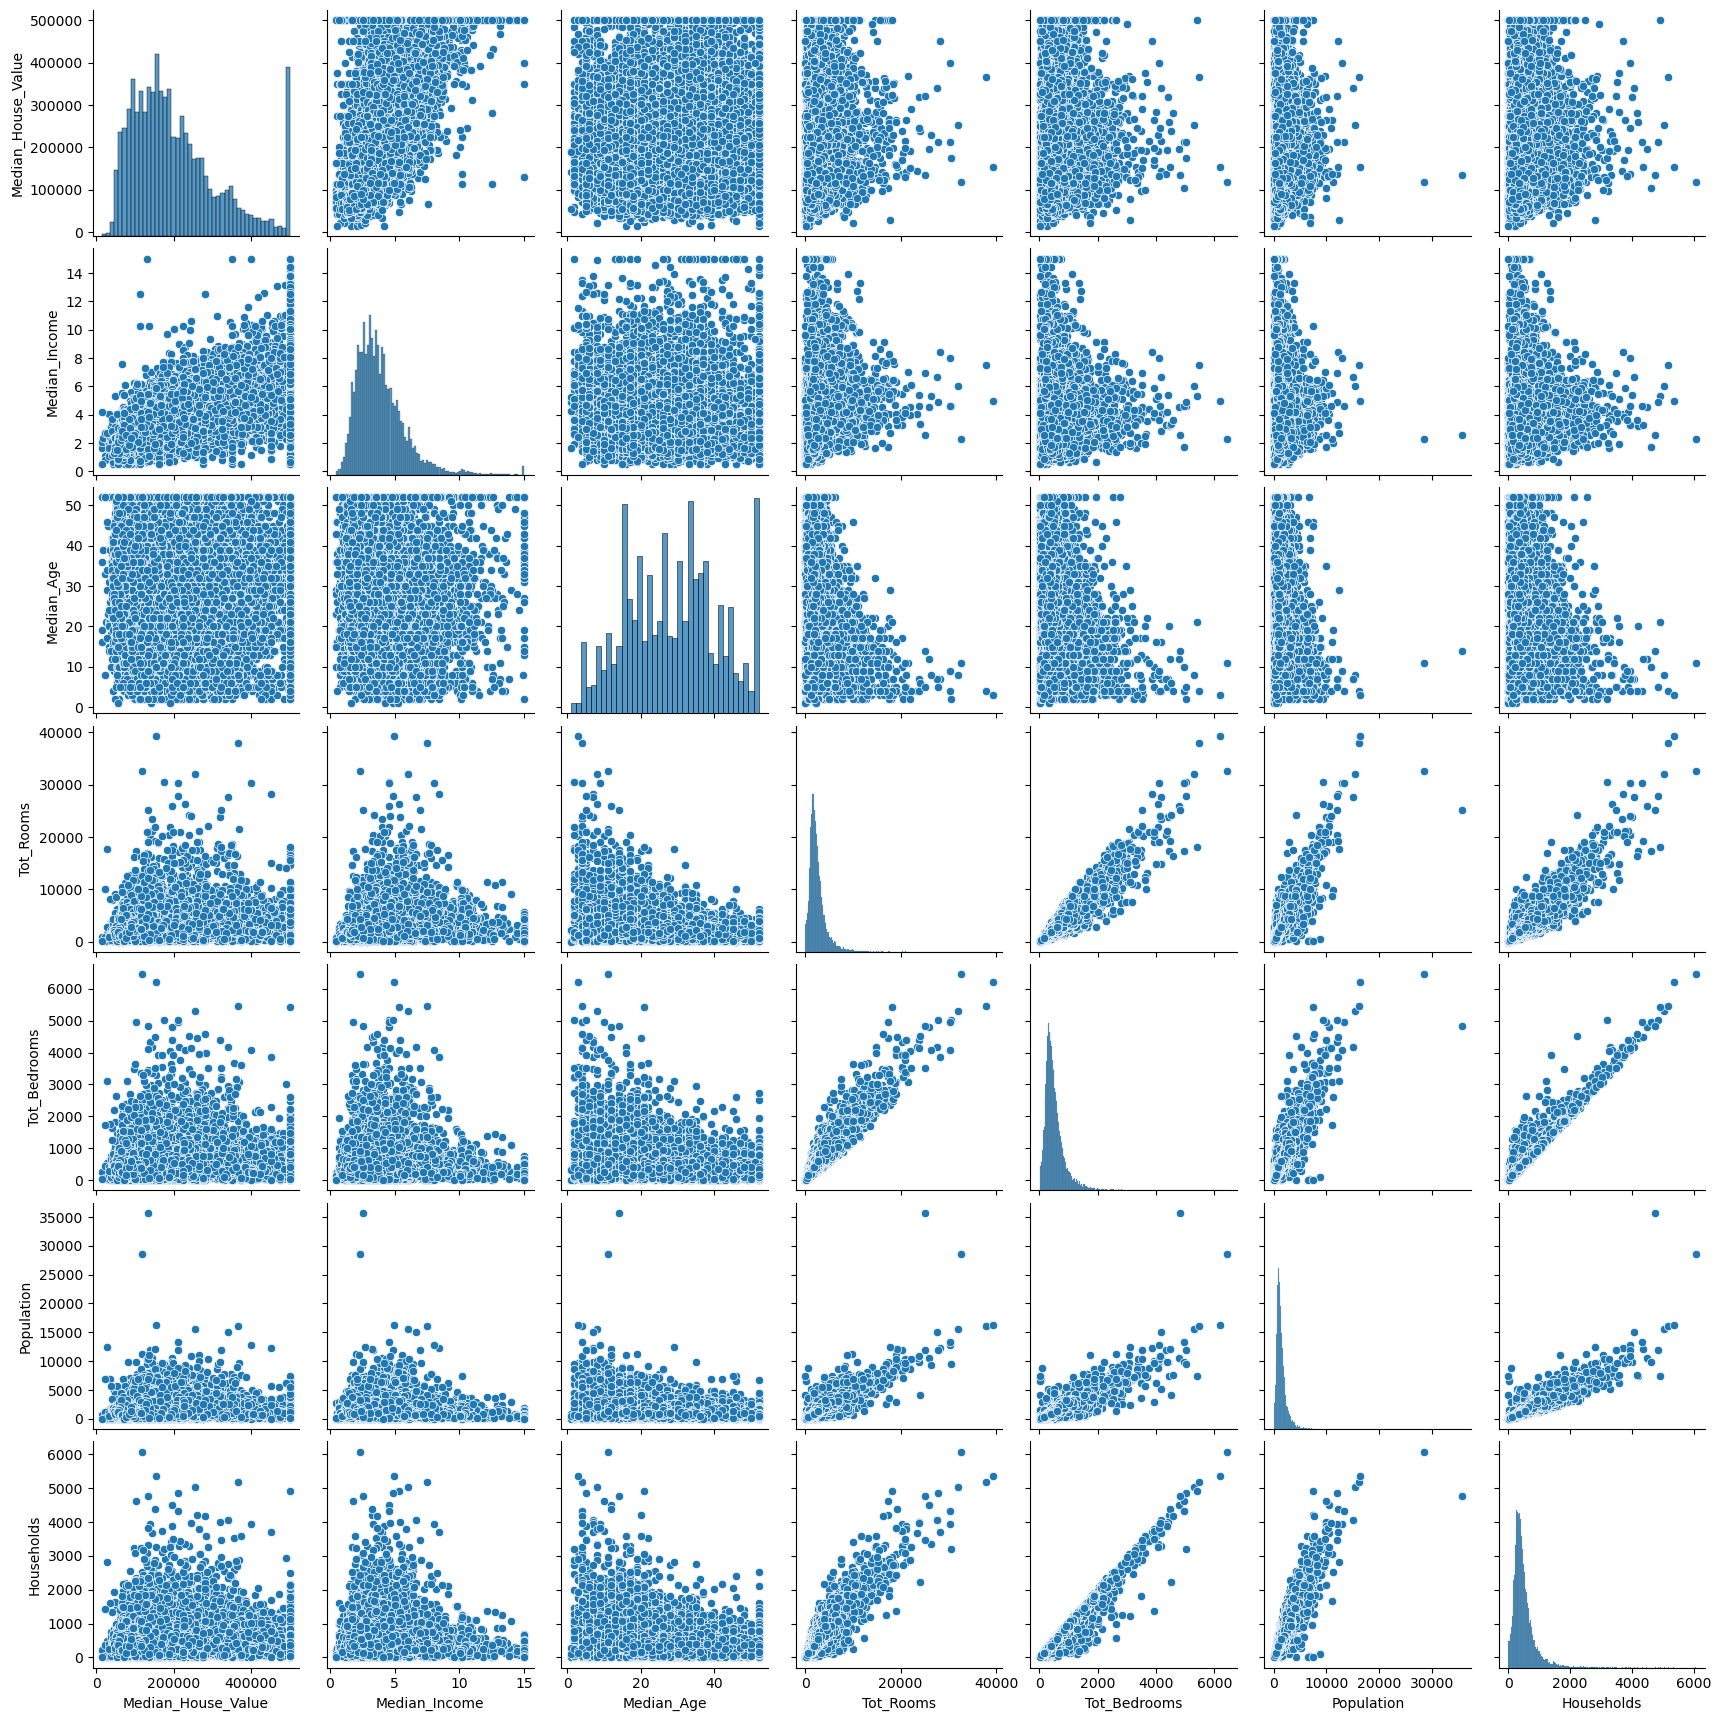

In [296]:
# Pairplot for w/o distance columns
sns.pairplot(df.drop(columns=columns_geographical))
plt.show()

We do not plot the distance values, as it would be too clustered.

bedrooms, tot rooms and household correlated

The dist. graphs will be analyzed in a different plot

## Checking distribution

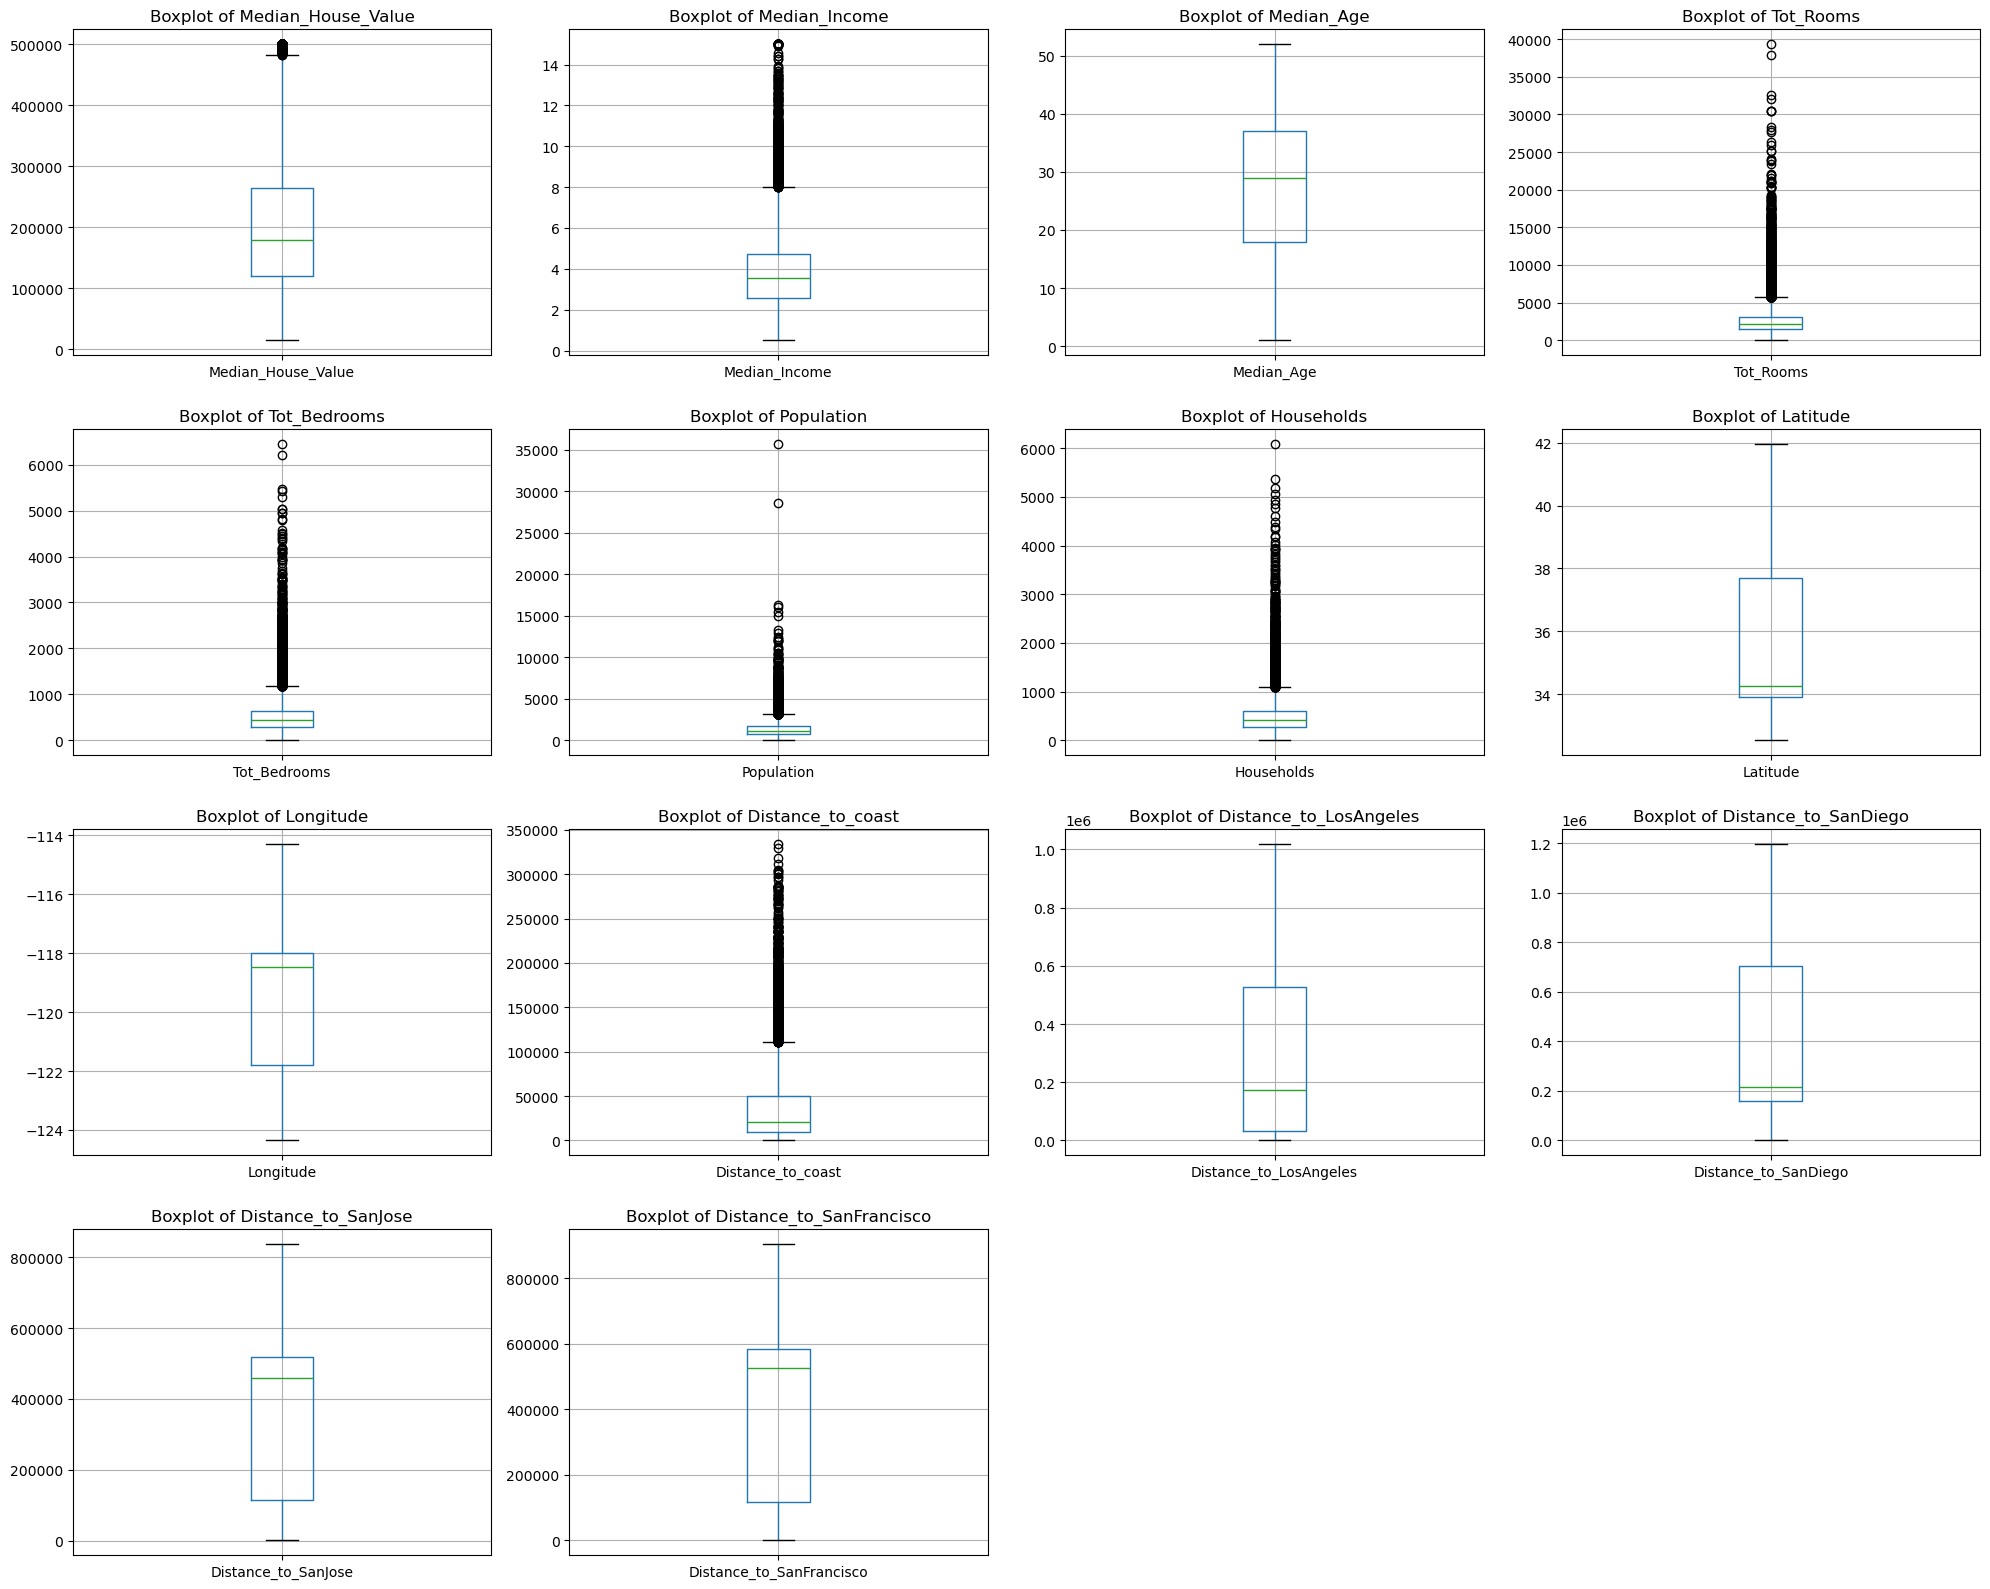

In [298]:
def boxplots():
  cols_per_row = 4
  num_rows = int(np.ceil(len(df.columns) / cols_per_row))
  fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(cols_per_row * 5, num_rows * 4))
  axes = axes.flatten()
  for index, column in enumerate(df.columns):
      ax = axes[index]
      df.boxplot(column=column, ax=ax, vert=True)
      ax.set_title(f'Boxplot of {column}')
  for j in range(index + 1, len(axes)):
      fig.delaxes(axes[j])
  plt.tight_layout()
  plt.show()

boxplots()

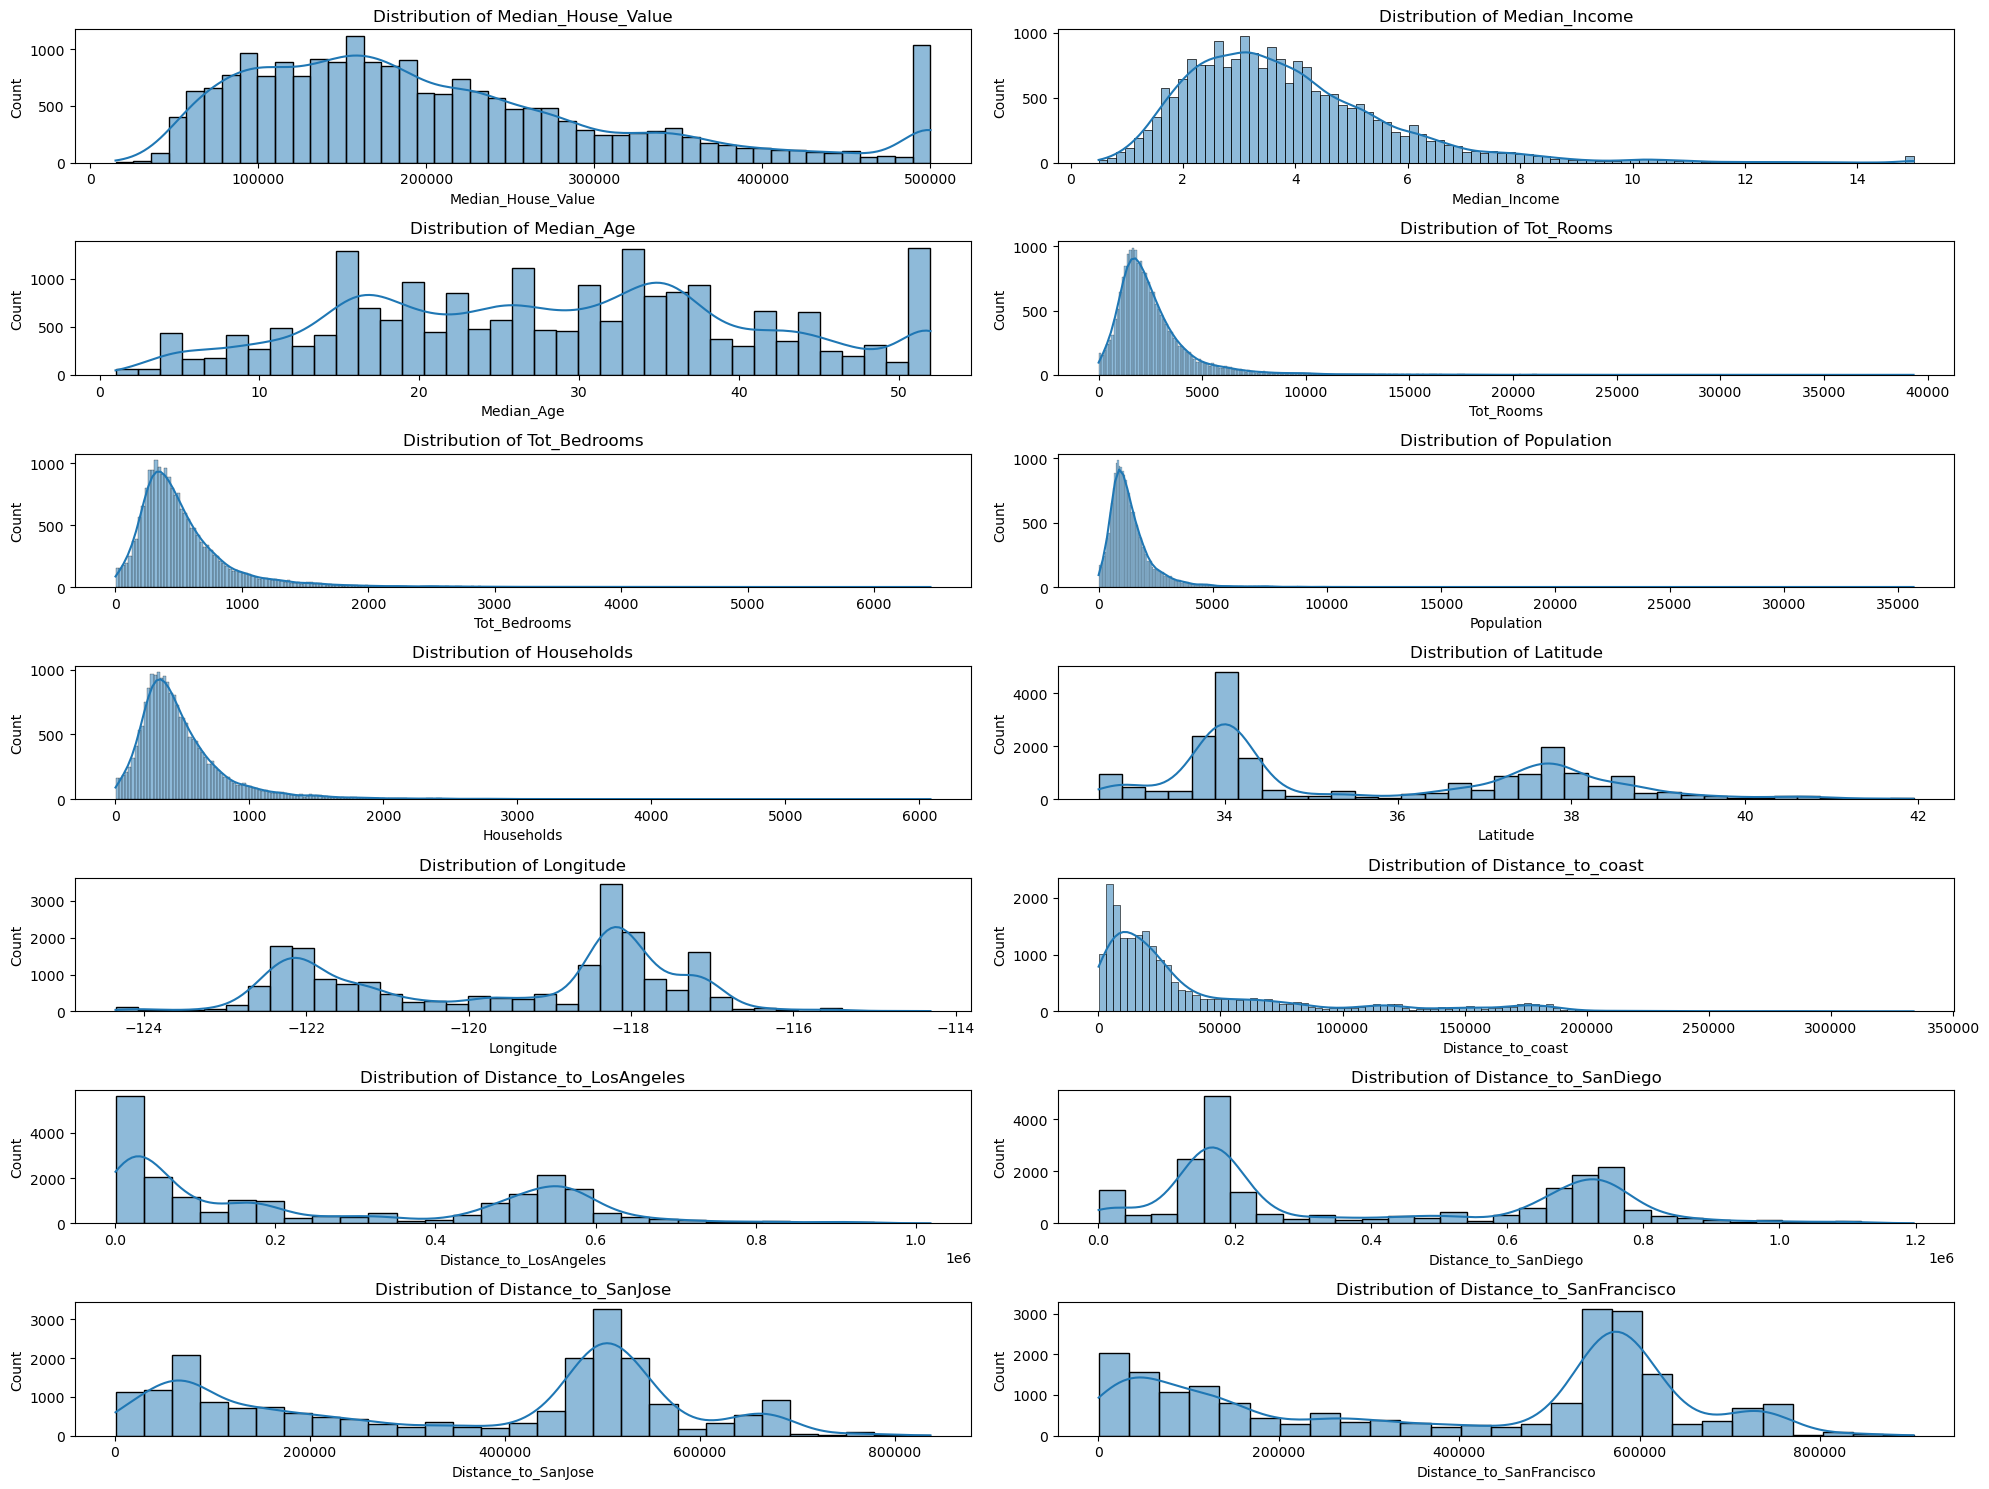

In [299]:
# Plot density plots for all variables in a single figure
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

If we take a look at the boxplot, for most of the columns we have a lot outliers using the IQR method. However, this is misleading as if we look at the density plots we can observe that we have multiple clusters at different value ranges. For example looking at `Median_House_Value`. 

Given that this is real data which makes sense in California in particular, there are people who have a very large income and can afford expensive housing. While conducting analysis and model building we can keep these in mind when considering the limitations of the analysis and the model.

## Correlation

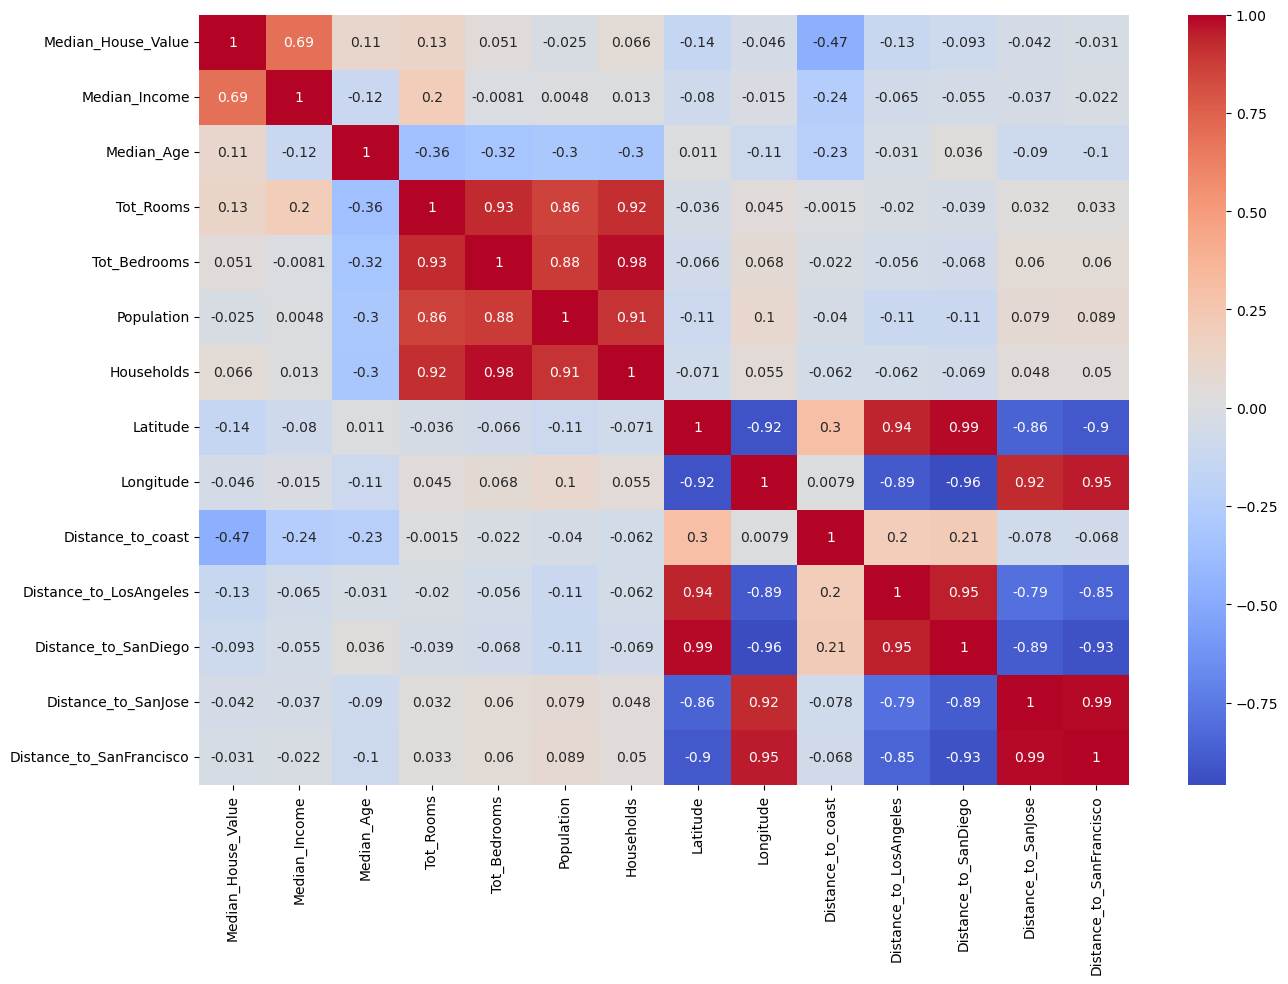

In [300]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In the heatmap above, we can see that a lot of the variables are highly correlated. 

### Feature Engineering

Given we have a lot of highly correlated variables (>0.8) 

In [301]:
from sklearn.decomposition import PCA

# Extract the relevant columns
bedrooms_rooms = df[['Tot_Bedrooms', 'Tot_Rooms']]

# Standardize the data
scaler = StandardScaler()
bedrooms_rooms_scaled = scaler.fit_transform(bedrooms_rooms)

# Apply PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(bedrooms_rooms_scaled)

# Add the principal component back to the dataframe
df['Bedrooms_Rooms_PCA'] = principal_components

,Median_House_Value,Median_Income,Median_Age,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LosAngeles,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Bedrooms_Rooms_PCA
0,452600.0,8.3252,41,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767,-1.255486
1,358500.0,8.3014,21,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400,2.400302
2,352100.0,7.2574,52,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450,-0.962825
3,341300.0,5.6431,52,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,-0.949843
4,342200.0,3.8462,52,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,-0.759887


Experimenting with additional feature engineering techniques, we decided to apply PCA on `Tot_Bedrooms` and `Tot_Rooms`. Due to the fact that they carry similar information (verifiable by what the variables themselves represent, alongside their high correlation), we decided to combine them into a single feature, therefore avoiding the issue of multicollinearity.

In [302]:
# df['Bedroom_Prop'] = df['Tot_Bedrooms'] / df['Tot_Rooms']
df['Avg_Pop_Per_Household'] = df['Population'] / df['Households']
df.drop(columns=['Households', 'Tot_Bedrooms', 'Tot_Rooms'], inplace=True)

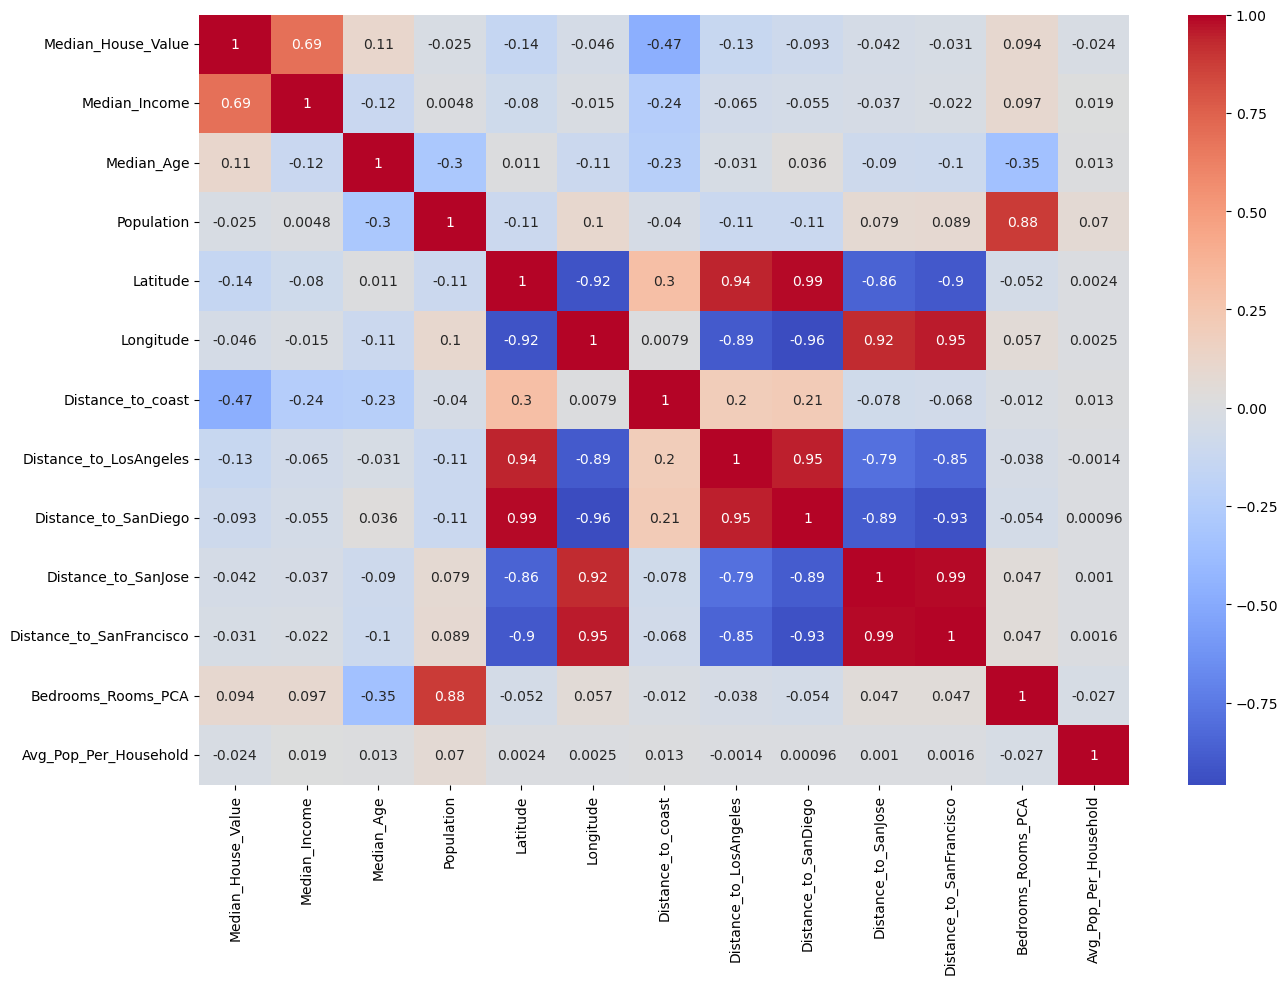

In [303]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

EXPLAIN THIS

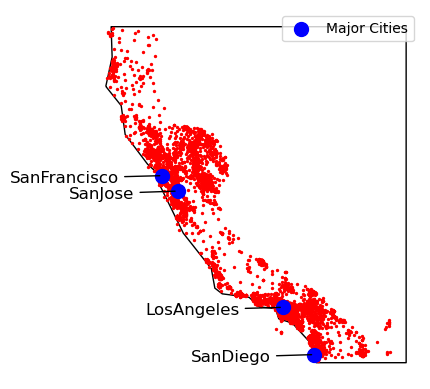

In [304]:
# Create a DataFrame for the cities with their coordinates
gdf_cities = gpd.GeoDataFrame({
    'City': ['SanJose', 'SanFrancisco', 'LosAngeles', 'SanDiego'],
    'Latitude': [37.3382, 37.7749, 34.0522, 32.7157],
    'Longitude': [-121.8863, -122.4194, -118.2437, -117.1611]
}, geometry=gpd.points_from_xy([-121.8863, -122.4194, -118.2437, -117.1611], [37.3382, 37.7749, 34.0522, 32.7157]), crs="EPSG:4326")

# Plot the cities on the map
ax = world.clip([-130,32.5,-114,42]).plot(color="white", edgecolor="black")
gdf.plot(ax=ax, color="red", markersize=2)
gdf_cities.plot(ax=ax, color="blue", markersize=100, marker='o', label='Major Cities')

# Add labels for the cities with an offset to the left and a line connecting to the point
for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities['City']):
    ax.annotate(label, xy=(x, y), xytext=(x - 1.5, y - 0.2),
                textcoords='data', fontsize=12, ha='right',
                arrowprops=dict(arrowstyle="-", color='black'))

ax.axis('off')
plt.legend(loc='upper right')
plt.legend()
plt.show()

In [312]:
# Create new Closest City column for Los Angeles and San Francisco Sanjose and San Diego using distance collumnns
df['Closest_Distance'] = df[[column for column in df.columns if column.startswith('Distance_')]].min(axis=1)

df['Closest_Distance'] = df[['Distance_to_LosAngeles', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']].min(axis=1)

df['Closest_City'] = np.where(df['Distance_to_LosAngeles'] == df['Closest_Distance'], 'LosAngeles',
                     np.where(df['Distance_to_SanDiego'] == df['Closest_Distance'], 'SanDiego',
                     np.where(df['Distance_to_SanJose'] == df['Closest_Distance'], 'SanJose', 'SanFrancisco')))

df.drop(columns=['Distance_to_LosAngeles', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco'], inplace=True)

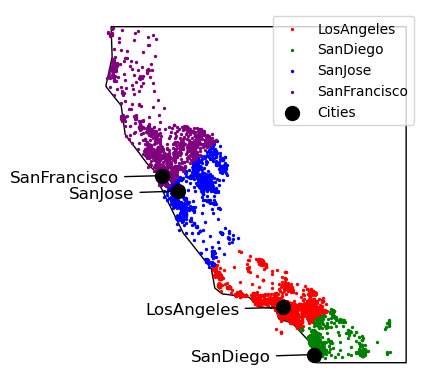

In [95]:
# Map the points into a map, keeping the city points and using the Closest_City column to color the points

# Define colors for each city
colors = {'LosAngeles': 'red', 'SanDiego': 'green', 'SanJose': 'blue', 'SanFrancisco': 'purple'}

# Create a GeoDataFrame for the points with the closest city
gdf['Closest_City'] = df['Closest_City']

# Plot the world map restricted to California
ax = world.clip([-130, 32.5, -114, 42]).plot(color="white", edgecolor="black")

# Plot the points colored by the closest city
for city, color in colors.items():
    gdf[gdf['Closest_City'] == city].plot(ax=ax, color=color, markersize=2, label=city)

# Plot the cities on the map
gdf_cities.plot(ax=ax, color="black", markersize=100, marker='o', label='Cities')

# Add labels for the cities with an offset to the left and a line connecting to the point
for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities['City']):
    ax.annotate(label, xy=(x, y), xytext=(x - 1.5, y - 0.2),
                textcoords='data', fontsize=12, ha='right',
                arrowprops=dict(arrowstyle="-", color='black'))

# Remove axes completely
ax.axis('off')

# Move the legend to the right
plt.legend(loc='upper right')
plt.show()

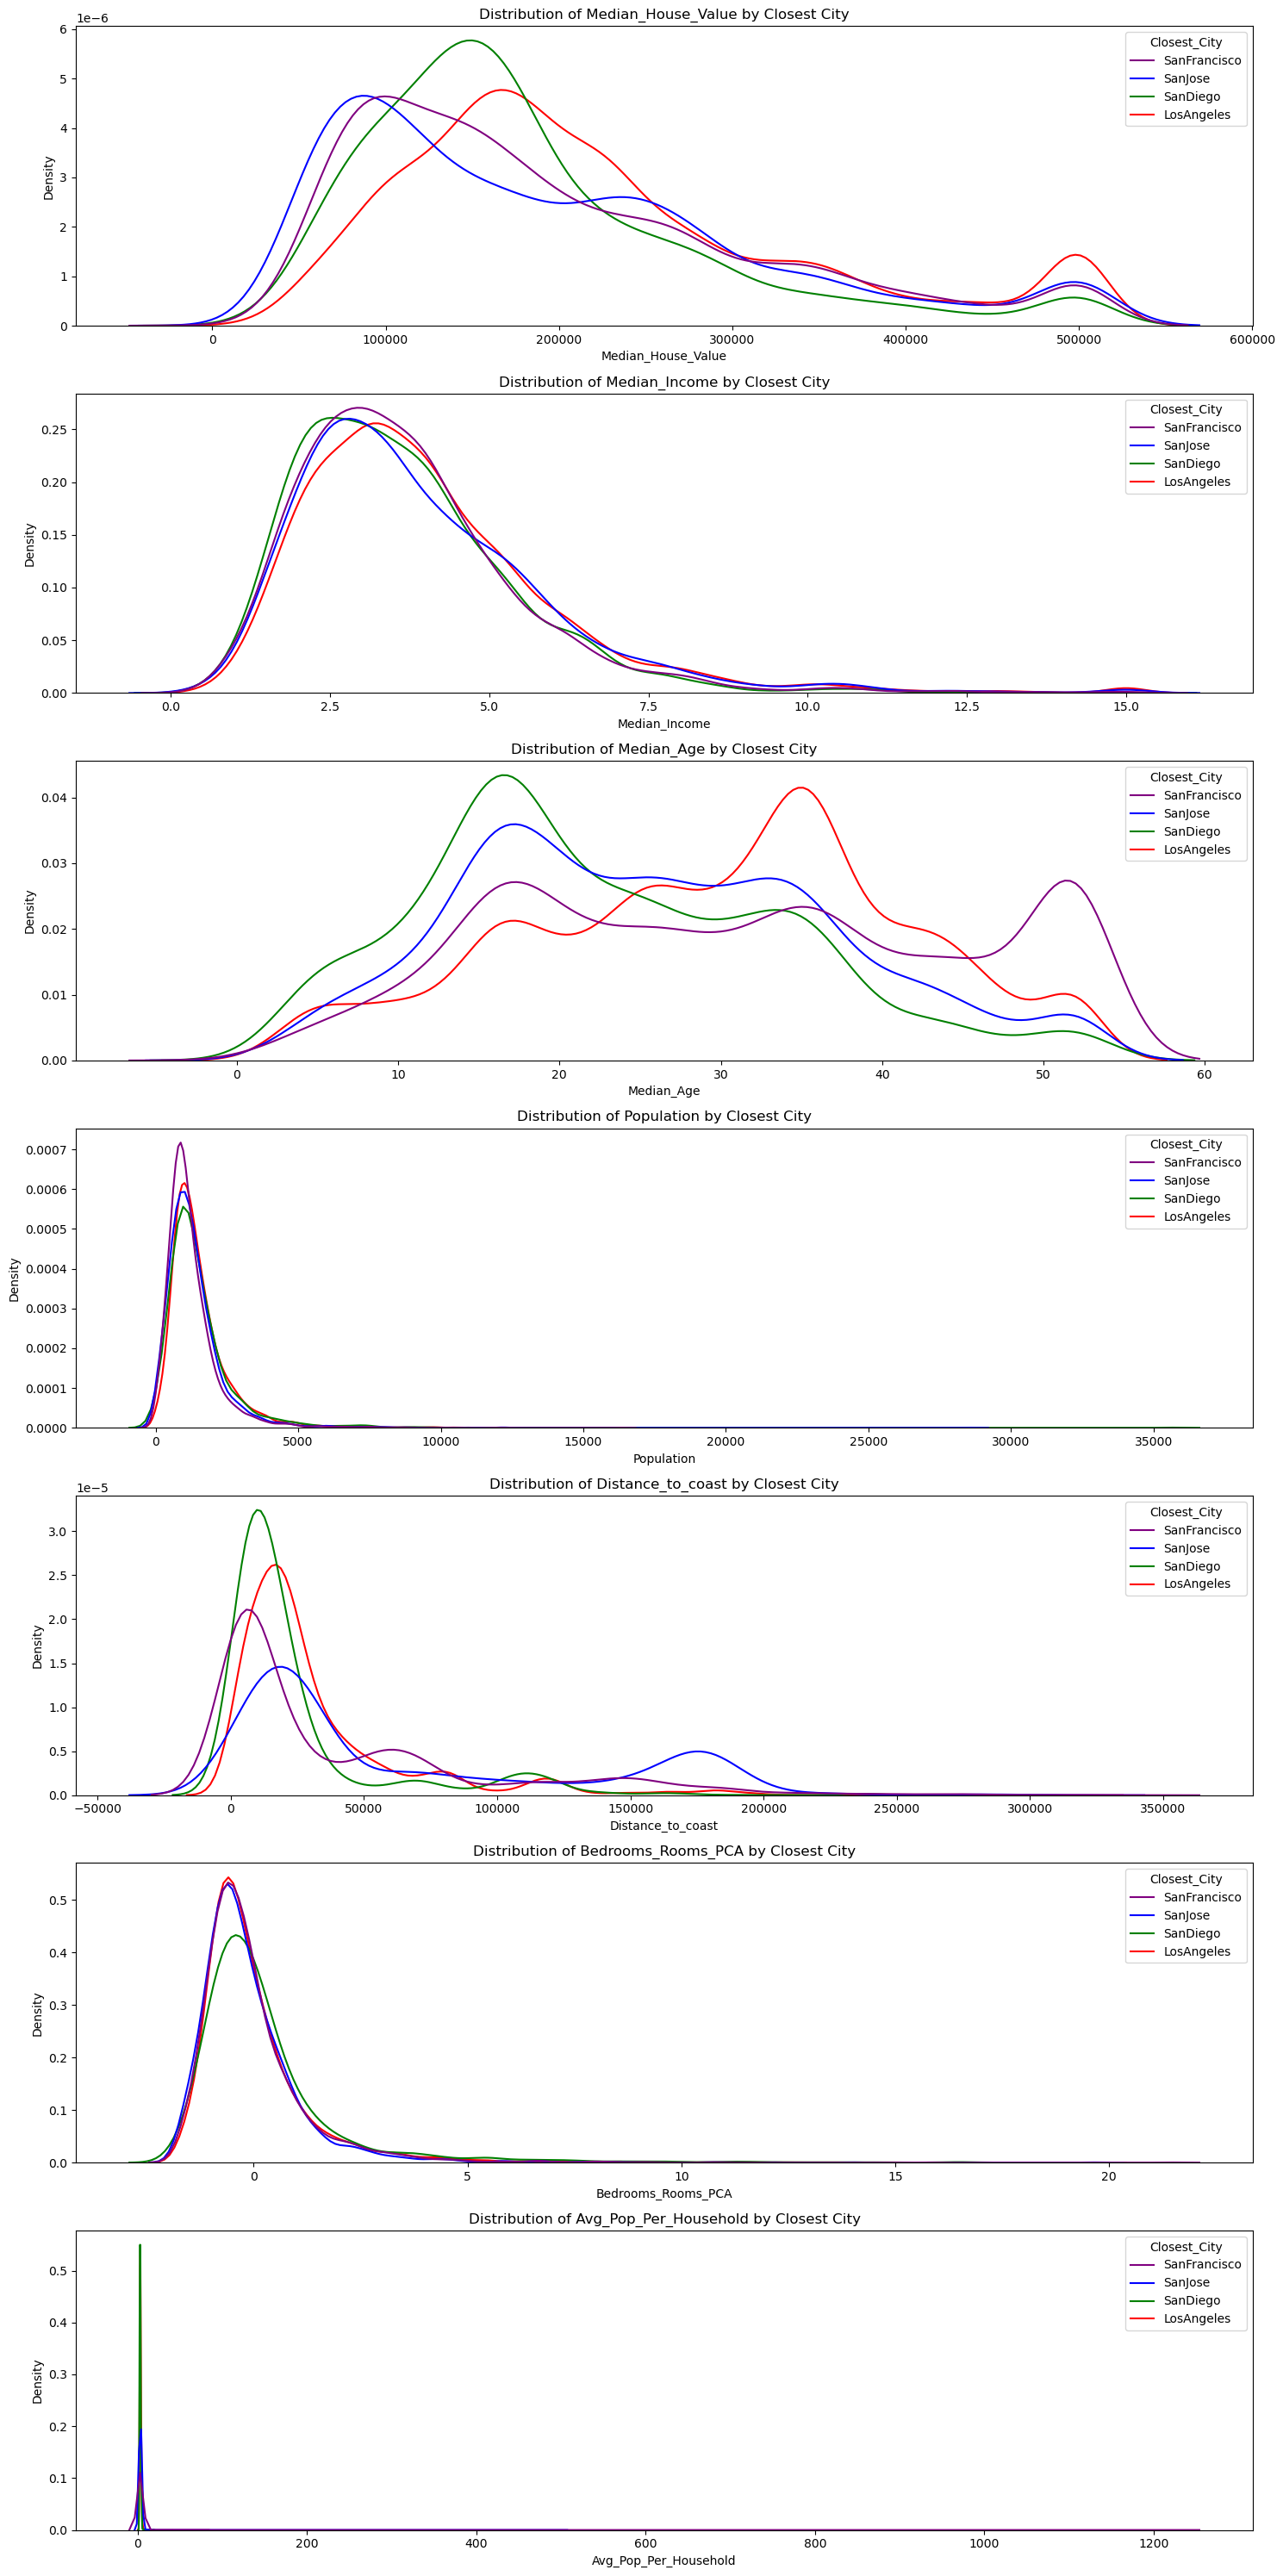

In [325]:
columns_to_plot = [col for col in df.columns if col not in ['Longitude', 'Latitude',
                                                            'Distance_to_LosAngeles', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco',
                                                            'Closest_Distance', 'Closest_City']]

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(15, 30))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.kdeplot(data=df, x=col, hue='Closest_City', common_norm=False, palette=colors, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Closest City')

plt.tight_layout()
plt.show()

# 2) Regression Models

## Linear Regression:

In [127]:
df.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Population', 'Distance_to_coast', 'Distance_to_LosAngeles',
       'Distance_to_SanDiego', 'Distance_to_SanJose',
       'Distance_to_SanFrancisco', 'Bedroom_Prop', 'Avg_Pop_per_household'],
      dtype='object')

In [128]:
# Select the features and target variable
X = df[['Median_Income', 'Median_Age', 'Tot_Rooms', 'Bedroom_Prop', 'Population', 'Avg_Pop_per_household']]
y = df['Median_House_Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 5925013075.287807
Coefficients: [ 97382.8717058   23722.04644716  34480.1586071   34565.43043654
 -27100.67199516  -2395.10195606]
Intercept: 207194.6937378876


In [129]:
# Summary of the linear regression model
print("Linear Regression Model Summary")
print("--------------------------------")
print(f"Intercept: {model.intercept_}")
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef}")

# Calculate and print R-squared
r_squared = model.score(X_test_scaled, y_test)
print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Linear Regression Model Summary
--------------------------------
Intercept: 207194.6937378876
Coefficients:
  Median_Income: 97382.87170580006
  Median_Age: 23722.04644715868
  Tot_Rooms: 34480.158607104975
  Bedroom_Prop: 34565.43043654142
  Population: -27100.67199515584
  Avg_Pop_per_household: -2395.1019560589953

Mean Squared Error: 5925013075.287807
R-squared: 0.5478500854564063


In [130]:
import statsmodels.api as sm

# Add a constant to the model (intercept)
X_train_const = sm.add_constant(X_train_scaled)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_train_const).fit()

# Print the summary of the model
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     Median_House_Value   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     3685.
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:17:04   Log-Likelihood:            -2.0891e+05
No. Observations:               16512   AIC:                         4.178e+05
Df Residuals:                   16505   BIC:                         4.179e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.072e+05    588.389    352.139      0.0

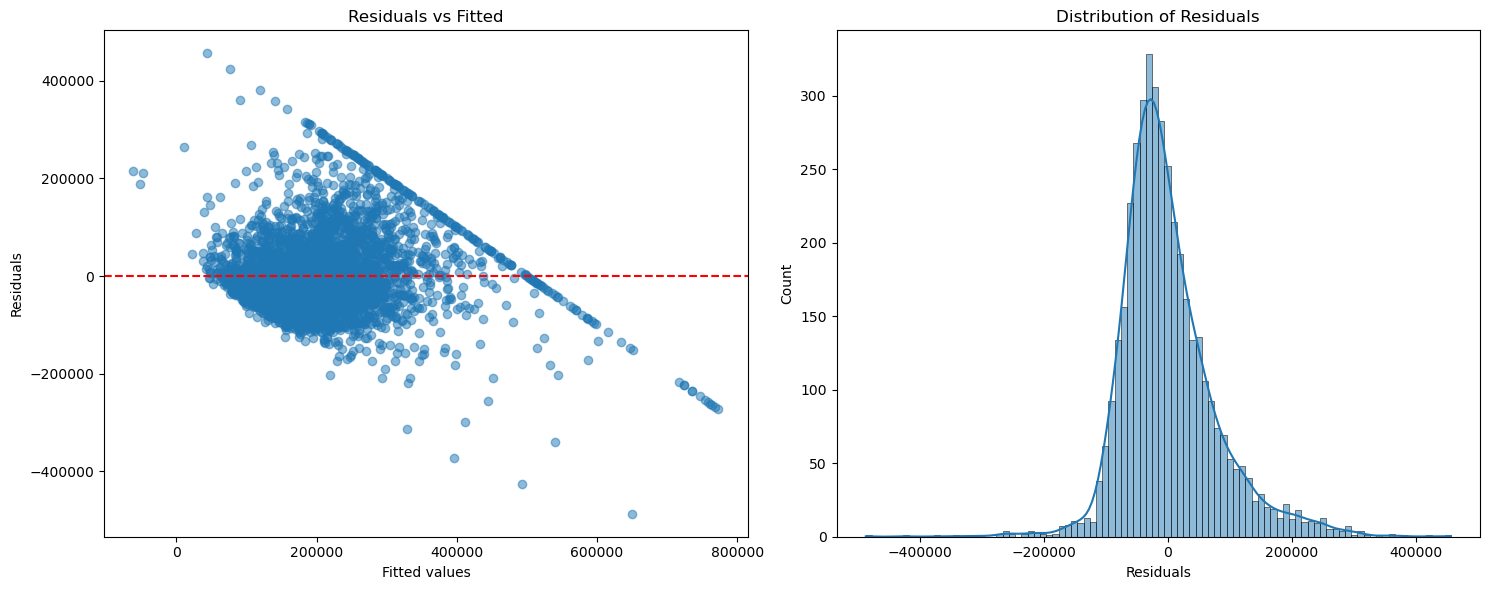

R-squared: 0.5478500854564063


In [131]:
# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(15, 6))

# Residuals vs Fitted
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

# Q-Q plot
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# Calculate and print R-squared
r_squared = model.score(X_test_scaled, y_test)
print(f'R-squared: {r_squared}')



In [133]:
df.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Population', 'Distance_to_coast', 'Distance_to_LosAngeles',
       'Distance_to_SanDiego', 'Distance_to_SanJose',
       'Distance_to_SanFrancisco', 'Bedroom_Prop', 'Avg_Pop_per_household'],
      dtype='object')

## Random Forest Regression

In [134]:

# Select the features and target variable
features = [col for col in df.columns if col not in ['Median_House_Value', 'Longitude', 'Latitude',
                                                     'Distance_to_LosAngeles', 'Distance_to_SanDiego',
                                                     'Distance_to_SanJose', 'Distance_to_SanFrancisco',
                                                     'Closest_Distance', 'Closest_City']]
X = df[features]
y = df['Median_House_Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate the mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

# Print the feature importances
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))

Mean Squared Error (Random Forest): 3511545921.00628
                 Feature  Importance
0          Median_Income    0.501865
4      Distance_to_coast    0.196051
6  Avg_Pop_per_household    0.136502
1             Median_Age    0.053943
5           Bedroom_Prop    0.049233
2              Tot_Rooms    0.032070
3             Population    0.030335


In [135]:


# Calculate Mean Squared Error (MSE) for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Linear Regression): {mse_lr}')

# Calculate Mean Absolute Percentage Error (MAPE) for Linear Regression
mape_lr = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (Linear Regression): {mape_lr}')

# Fit the model using statsmodels to get AIC and BIC
X_test_const = sm.add_constant(X_test_scaled)
model_sm = sm.OLS(y_test, X_test_const).fit()

# AIC and BIC calculation
aic_lr = model_sm.aic
bic_lr = model_sm.bic
print(f'AIC (Linear Regression): {aic_lr}')
print(f'BIC (Linear Regression): {bic_lr}')


Mean Squared Error (Linear Regression): 5925013075.287807
Mean Absolute Percentage Error (Linear Regression): 0.34828149782276835
AIC (Linear Regression): 104603.19149937487
BIC (Linear Regression): 104647.470337525


In [136]:
# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print(f'Mean Absolute Percentage Error (Random Forest): {mape_rf}')

# Calculate AIC and BIC
n = len(y_test)
p = X_test.shape[1]

# AIC calculation
aic_rf = n * np.log(mse_rf) + 2 * p
print(f'AIC (Random Forest): {aic_rf}')

# BIC calculation
bic_rf = n * np.log(mse_rf) + p * np.log(n)
print(f'BIC (Random Forest): {bic_rf}')

Mean Squared Error (Random Forest): 3511545921.00628
Mean Absolute Percentage Error (Random Forest): 0.23205825455448242
AIC (Random Forest): 90744.64208617008
BIC (Random Forest): 90788.9209243202


Model Comparison

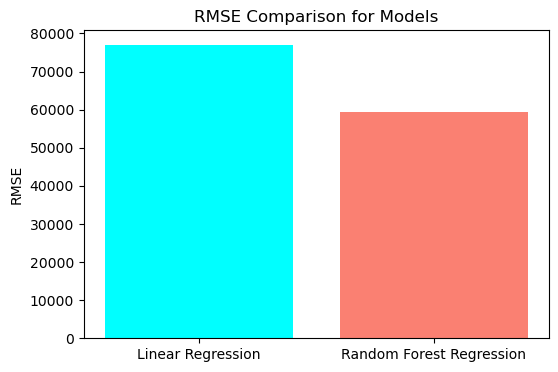

In [137]:
models = ['Linear Regression', 'Random Forest Regression']
mse_values = [np.sqrt(mse_lr), np.sqrt(mse_rf)]
#r2_values = [r2_lr, r2_ridge, r2_lasso]
mape_values = [mape_lr, mape_rf]

plt.figure(figsize=(6, 4))
plt.bar(models, mse_values, color=['cyan', 'salmon'])
plt.ylabel('RMSE')
plt.title('RMSE Comparison for Models')
plt.show()

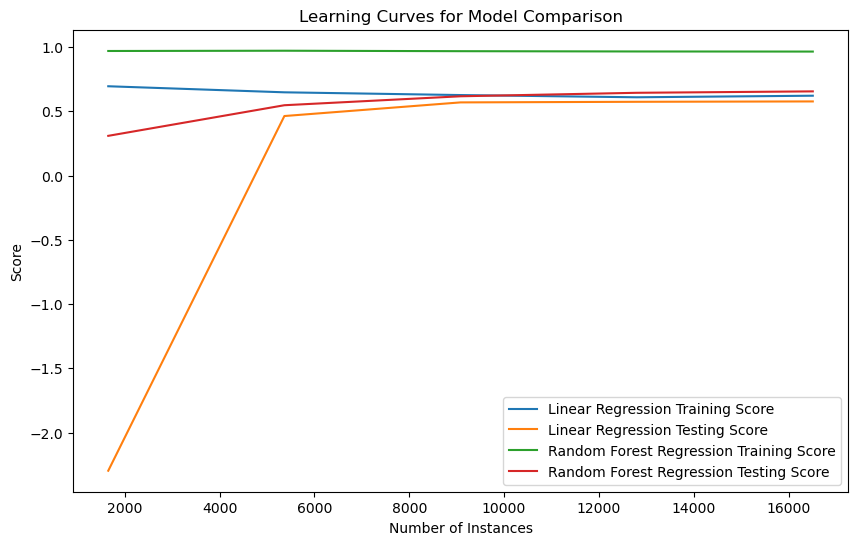

In [138]:
train_size, train_scores1, test_scores1 = learning_curve(model, X, y, cv=5)
train_size, train_scores2, test_scores2 = learning_curve(rf_model, X, y, cv=5)
plt.figure(figsize=(10, 6))
plt.plot(train_size, np.mean(train_scores1, axis=1), label='Linear Regression Training Score')
plt.plot(train_size, np.mean(test_scores1, axis=1), label='Linear Regression Testing Score')
plt.plot(train_size, np.mean(train_scores2, axis=1), label='Random Forest Regression Training Score')
plt.plot(train_size, np.mean(test_scores2, axis=1), label='Random Forest Regression Testing Score')
plt.xlabel('Number of Instances')
plt.ylabel('Score')
plt.title('Learning Curves for Model Comparison')
plt.legend()
plt.show()

In [139]:
# Generate predictions for each tree in the Random Forest
all_tree_predictions = np.array([tree.predict(X_test) for tree in rf_model.estimators_])

# Calculate the prediction interval (e.g., 95% prediction interval)
lower_bound = np.percentile(all_tree_predictions, 2.5, axis=0)
upper_bound = np.percentile(all_tree_predictions, 97.5, axis=0)

# Calculate the percentage of the actual test data that falls within the interval
within_interval = np.mean((y_test >= lower_bound) & (y_test <= upper_bound)) * 100

print(f'Percentage of test data within the 95% prediction interval: {within_interval:.2f}%')

c:\Users\mikol\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\mikol\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\mikol\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\mikol\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\mikol\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\mikol\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fi

Percentage of test data within the 95% prediction interval: 92.15%


c:\Users\mikol\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\mikol\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\mikol\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\mikol\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\mikol\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\mikol\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fi

In [140]:
# Generate predictions for the linear regression model
y_pred_lr = model.predict(X_test_scaled)

# Calculate the prediction intervals using np.percentile
lower_bound_lr = np.percentile(y_pred_lr, 2.5)
upper_bound_lr = np.percentile(y_pred_lr, 97.5)

# Calculate the percentage of the actual test data that falls within the interval
within_interval_lr = np.mean((y_test >= lower_bound_lr) & (y_test <= upper_bound_lr)) * 100

print(f'Percentage of test data within the 95% prediction interval (Linear Regression): {within_interval_lr:.2f}%')


Percentage of test data within the 95% prediction interval (Linear Regression): 82.90%


Hyperparameter Tuning

In [141]:
model = LinearRegression()
grid = {'fit_intercept': [True, False], 'positive': [True, False]}
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=40)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" %((-grid_result.best_score_), grid_result.best_params_))
means = -grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: name 'RepeatedKFold' is not defined

In [ ]:
model = RandomForestRegressor()
grid = {
    'n_estimators': [100, 200, 300],    # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the tree
}
grid_search = GridSearchCV(estimator=model, param_grid=grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" %((-grid_result.best_score_), grid_result.best_params_))
means = -grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Bibliography

Williams, A. K. (2000). The long wait: The critical shortage of housing in California. Housing California.